<a href="https://colab.research.google.com/github/jperezJR/ALURA_ImersaoDados/blob/main/MyCode_Aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 5

##Ler arquivo 'dados_experimentos.zip' e 'dados_resultados.csv'

In [ ]:
import pandas as pd

dados = pd.read_csv('https://github.com/jperezJR/ALURA_ImersaoDados/blob/main/dados_experimentos.zip?raw=true', compression='zip')
dados_resultados = pd.read_csv('https://github.com/jperezJR/ALURA_ImersaoDados/blob/main/dados_resultados.csv?raw=true')

In [ ]:
mapa = {'droga' : 'composto' }

dados.rename(columns= mapa, inplace=True)

## Adicionar duas novas colunas na tabela dados_resultados

- n_moa  => numero de moas ativados 
- ativo_moa => se existe algum moa ativado

In [ ]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis = 1)

dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)

## Combinar dos dados das duas tabelas pelo 'id'.
## serão combinadas as colunas 'n_moa' e 'ativo_moa' na tabela dados

In [ ]:
dados_combinados = pd.merge(dados, dados_resultados[['id', 'n_moa', 'ativo_moa']], on='id')
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


##Criar grafico boxplot para os 5 primeiros compostos mais utilizados no gene 'g-0'

In [ ]:
composto_principal = dados_combinados['composto'].value_counts().index[:5]

composto_principal

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set()

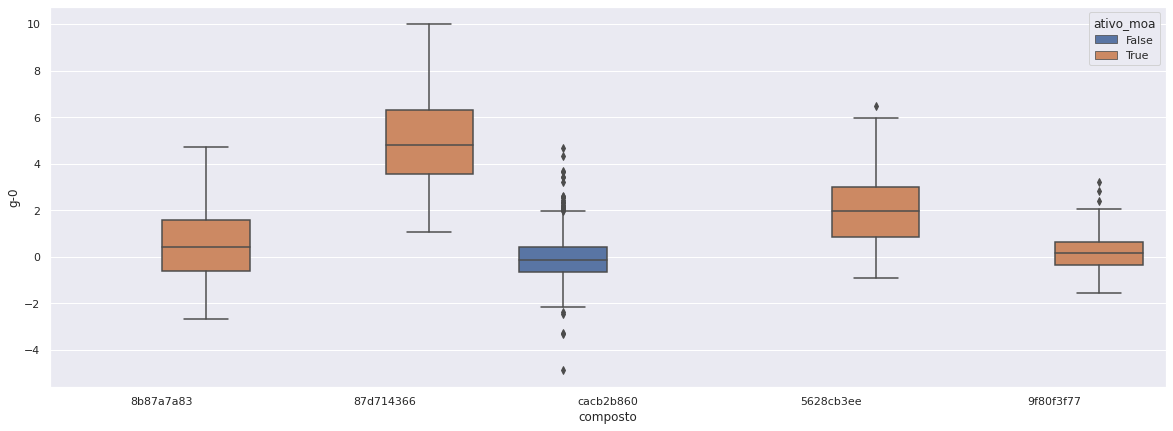

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data = dados_combinados.query('composto in @composto_principal'), x = 'composto', y = 'g-0', hue='ativo_moa')
plt.show()

##Importar a biblioteca scikit para análises de machine learning

- # Utilizar o modelo de Regressao Logistica

- 20% dos dados serao utilizados para teste

In [ ]:
from sklearn.linear_model import LogisticRegression   ## para utilizar o modelo de machine learning com regressão logística

from sklearn.model_selection import train_test_split  ## separa um conjunto de dados para treino e um conjunto de dados para teste





#criar modelo de regressao logistica
modelo_rlogistica = LogisticRegression(max_iter= 10000)


#definir os dados
# x = entrada da funcao => neste caso, a expressao genica  e a viabilidade celular g's e c's
# y = saida da funcao => neste caso, se ativou ou nao algum moa
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']


#separar dados para serem usados no modelo e para teste
#20% dos dados serao usados para teste
#random_state => para efeitos comparativos, devo garantir que a base de comparacao seja minimamente paracida com os outros modelos
#stratify => parametro para garantir a aproporcao entre as classes... ou seja, manter a mesma relacao de True ou False da tabela original. O argumento deve ser a coluna que quer garantir a proporcao 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 10456, stratify = y)

#treinar o modelo
modelo_rlogistica.fit(x_treino, y_treino)


#verificar a predicao e calcular a qualidade (score) do modelo usando o teste
modelo_rlogistica.score(x_teste, y_teste)


0.6271257610749528

## Utilizar o modelo Dummy para comparar o valores dos outros modelos

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score  #para calcular a acuracia do modelo

modelo_dummy = DummyClassifier(strategy='most_frequent')

modelo_dummy.fit(x_treino, y_treino)

#fazer a previsao do modelo de uma forma diferente.. .calculando a acuracia
previsao_dummy = modelo_dummy.predict(x_teste)

accuracy_score(y_teste, previsao_dummy)




0.6021415074532858

##Utilizar outro modelo de regressao = Arvore de Decisao

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo_arvore = DecisionTreeClassifier(max_depth = 3)

modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.6189376443418014

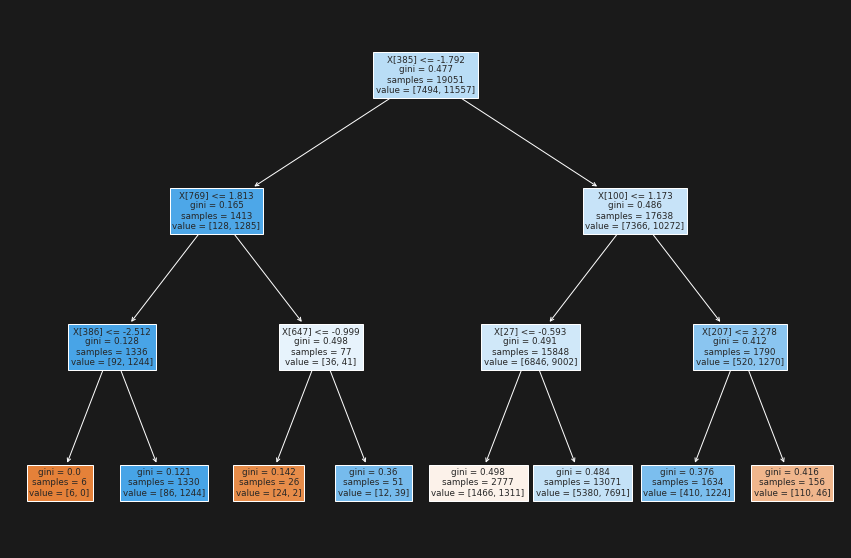

In [ ]:
#plotar a arvore de decisao
from sklearn import tree

fig, ax = plt.subplots(figsize=(15, 10), facecolor='k')
tree.plot_tree(modelo_arvore, filled=True, ax=ax)
plt.show()

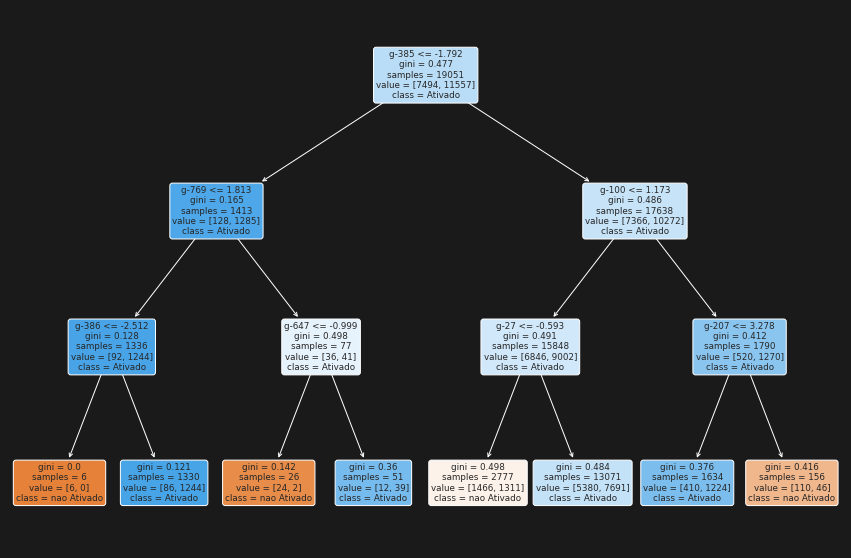

In [ ]:
#outra maneira de plotar a arvore de decisao

from sklearn import tree

fig, ax = plt.subplots(figsize=(15, 10), facecolor='k')
tree.plot_tree(modelo_arvore,
               ax=ax,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['nao Ativado', 'Ativado']
               )

plt.show()

###Aumentando a profundidade da arvore de decisao

In [ ]:
from sklearn.tree import DecisionTreeClassifier

teste = []
treino = []

for i in range(1,15):
  modelo_arvore = DecisionTreeClassifier(max_depth = i)
  modelo_arvore.fit(x_treino, y_treino)
  teste.append(modelo_arvore.score(x_teste, y_teste))
  treino.append(modelo_arvore.score(x_treino, y_treino))

In [ ]:
teste

[0.6067604450976275,
 0.6067604450976275,
 0.6189376443418014,
 0.6225068234306109,
 0.6227167751417174,
 0.6166281755196305,
 0.6172580306529498,
 0.6214570648750787,
 0.6153684652529918,
 0.6170480789418433,
 0.6094898173420114,
 0.6090699139197985,
 0.6092798656309049,
 0.6048708796976695]

In [ ]:
treino

[0.6066348223190384,
 0.6066348223190384,
 0.6196000209962732,
 0.6336150333315836,
 0.6384441761587318,
 0.6477875177156055,
 0.6613826045876857,
 0.6720907039000578,
 0.6892551572095953,
 0.7045824366175004,
 0.7267859954858013,
 0.7484121568421606,
 0.7654191381029867,
 0.782898535509947]

Enquanto os resultados utilizando os dados para treinamento aumentaram, o resultado para os testes nao aumentaram e ate pioraram com o aumento da profundidade da arvore de decisao

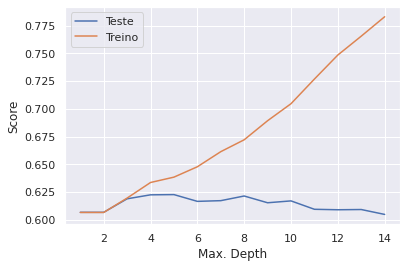

In [ ]:
sns.lineplot(x=range(1,15), y=teste, label='Teste')
sns.lineplot(x=range(1,15), y=treino, label='Treino').set(xlabel='Max. Depth', ylabel='Score')

plt.show()

##Para evitar o overfit, uma tecnica eh criar varias arvores de decisoes da qual ele pega amostras aleatorias dos dados 

- O modelo nao trabalho com dados 'string'. Desta forma, eh necessario converter as colunas *'tratamento'*, *'dose'*, e '*tempo*' em valores binarios.
Para isso eh utilizada o metodo get_dummies() do  **pandas** 





In [ ]:
pd.get_dummies(dados_combinados, columns=['tratamento', 'dose', 'tempo'])

,id,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,...,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,tratamento_com_controle,tratamento_com_droga,dose_D1,dose_D2,tempo_24,tempo_48,tempo_72
0,id_000644bb2,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,...,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,0,1,1,0,1,0,0
1,id_000779bfc,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,...,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,0,1,1,0,0,0,1
2,id_000a6266a,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,...,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,0,1,1,0,0,1,0
3,id_0015fd391,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,...,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,0,1,1,0,0,1,0
4,id_001626bd3,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,...,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,-0.1736,0.3686,-0.1565,...,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


#definir os dados
# x = entrada da funcao => neste caso, todas as informacoes menos as colunas 'id', 'composto', 'n_moa' e 'ativo_moa'.
#Porem o modelo nao trabalha com strings. Eh necessario converter esses dados em binario (0 ou 1)
# y = saida da funcao => neste caso, se ativou ou nao algum moa
x = dados_combinados.drop(['id', 'composto', 'n_moa','ativo_moa'], axis=1)  # retiro as colunas que nao quero
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo']) # da tabela sem as colunas acima, converto as informacoes em string para binario e utilizo com a base de dados para o modelo
y = dados_combinados['ativo_moa']


#criar modelo de regressao logistica
modelo_randomForest = RandomForestClassifier()

#separar dados para serem usados no modelo e para teste
#20% dos dados serao usados para teste
#random_state => para efeitos comparativos, devo garantir que a base de comparacao seja minimamente paracida com os outros modelos
#stratify => parametro para garantir a aproporcao entre as classes... ou seja, manter a mesma relacao de True ou False da tabela original. O argumento deve ser a coluna que quer garantir a proporcao 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 10456, stratify = y)

#treinar o modelo
modelo_randomForest.fit(x_treino, y_treino)


#verificar a predicao e calcular a qualidade (score) do modelo usando o teste
modelo_randomForest.score(x_teste, y_teste)

0.6873819021625026